In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv('Glass Identification.csv')

In [37]:
data.head(200)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7


In [24]:
data.shape

(214, 11)

In [25]:
data.describe( )


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [26]:
data.info( )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [32]:
data=data.drop(columns=['Id'])

In [33]:
print(data)

          RI     Na   Mg     Al     Si     K    Ca    Ba   Fe  Type of glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0              7

[214 rows x 10 columns]


ValueError: num must be 1 <= num <= 8, not 9

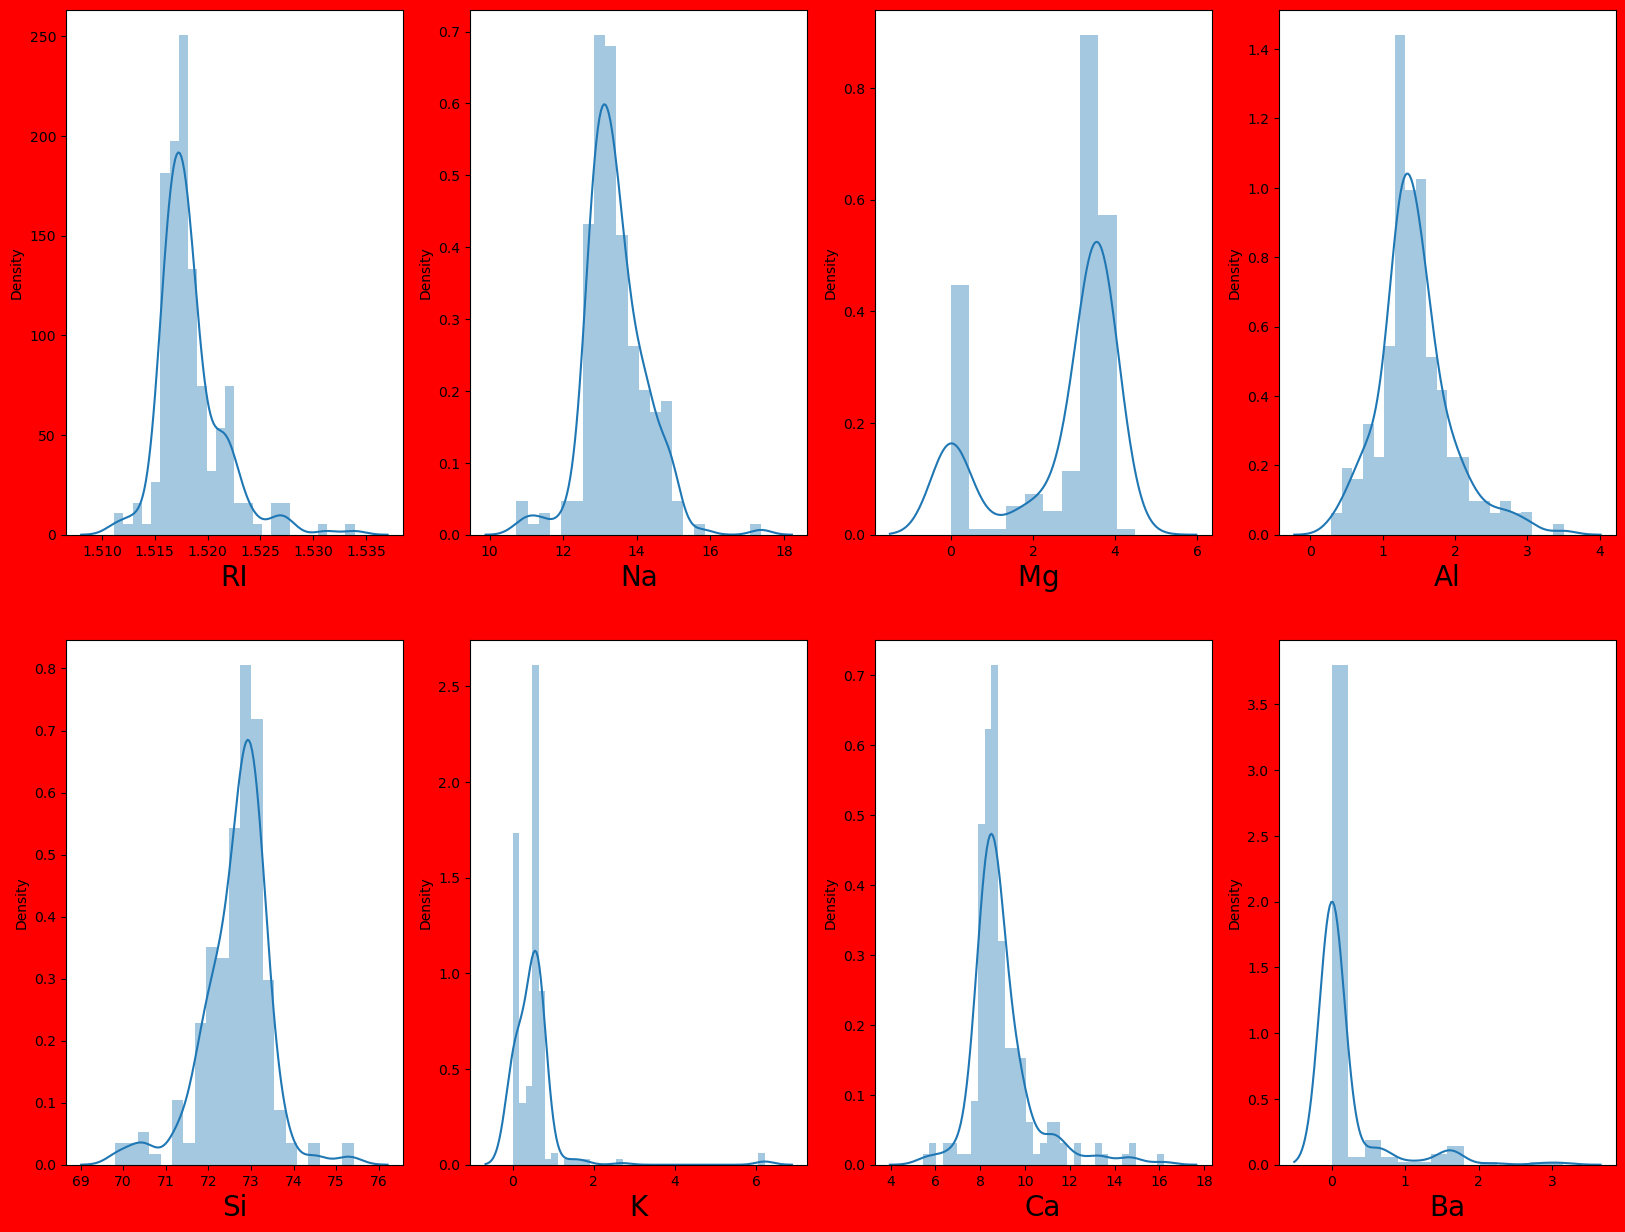

In [38]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in data:
      if plotnumber<=11:
            ax=plt.subplot(2,4,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=20)
            plotnumber+=1
plt.show( )


In [41]:
Y=data['Type of glass']
X=data.drop(columns= ['Type of glass'])


In [43]:
Scaler=StandardScaler( )
X_scaled=Scaler.fit_transform(X)


In [47]:
vif=pd.DataFrame( )
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,9.504579,RI
1,61.789643,Na
2,207.841338,Mg
3,25.682696,Al
4,58.176725,Si
5,43.620777,K
6,211.427466,Ca
7,26.135301,Ba
8,1.218039,Fe


In [45]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled, Y, test_size=0.25, random_state=348)

In [48]:
log_reg=LogisticRegression( )
log_reg.fit(x_train,y_train)


LogisticRegression()

In [52]:
y_pred=log_reg.predict(x_test)

In [54]:
print(y_pred)


[1 2 2 2 1 5 2 2 2 1 1 1 2 2 2 2 7 2 1 2 2 2 1 5 1 1 1 7 2 2 7 5 1 1 5 3 7
 2 1 2 2 2 1 2 1 2 1 2 7 1 2 2 5 2]


In [55]:
accuracy=accuracy_score(y_test, y_pred)
accuracy
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix


array([[11,  4,  1,  0,  0],
       [ 6, 17,  0,  3,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  2,  0,  2,  0],
       [ 0,  1,  0,  0,  5]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.65      0.69      0.67        16
           2       0.65      0.65      0.65        26
           3       0.00      0.00      0.00         2
           5       0.40      0.50      0.44         4
           7       1.00      0.83      0.91         6

    accuracy                           0.65        54
   macro avg       0.54      0.53      0.53        54
weighted avg       0.65      0.65      0.65        54

